<a href="https://colab.research.google.com/github/elka97/GBMegafon/blob/main/Auto_ViML_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/AutoViML/Auto_ViML.git

In [ ]:
import pandas as pd

https://github.com/AutoViML/Auto_ViML

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
DATASET_PATH = "/gdrive/My Drive/Megafon/"
DATA_PATH_OUTPUT = "/gdrive/My Drive/Megafon/autoVizMLOutput/"

In [ ]:
sep = ','
target = 'target'
datapath = DATASET_PATH
filename = 'fiches_train_buy_time_id_True_nearest.csv'  #'data_train_features.csv'

In [ ]:
####   THIS SHOULD print Version Number. If it doesn't, it means you don't have latest version ## 
### If you want to see the sitepackages version use this
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.684. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [ ]:
df = pd.read_csv(datapath+filename,sep=sep,index_col=None)
# df['buy_time'] = df['buy_time'].astype('datetime64[s]')
df = df.sample(frac=0.5,random_state=888)

In [ ]:
df.shape

(415826, 261)

In [ ]:
# num = int(0.9*df.shape[0])
num = int(0.75*df.shape[0])
train = df[:num]
test = df[num:]
sample_submission=''

scoring_parameter="macro-f1"
scoring_parameter = 'balanced-accuracy'

In [ ]:
# Tips for using Auto_ViML:
# For Classification problems and imbalanced classes, choose scoring_parameter="balanced_accuracy". It works better.
# For Imbalanced Classes (<5% samples in rare class), choose "Imbalanced_Flag"=True. You can also set this flag to True for Regression problems where the target variable might have skewed distributions.
# For Multi-Label dataset, the target input target variable can be sent in as a list of variables.
# It is recommended that you first set Boosting_Flag=None to get a Linear model. Once you understand that, then you can try to set Boosting_Flag=False to get a Random Forest model. Finally, try Boosting_Flag=True to get an XGBoost model. This is the order that we recommend in order to use Auto_ViML.
# Finally try Boosting_Flag="CatBoost" to get a complex but high performing model.
# Binning_Flag=True improves a CatBoost model since it adds to the list of categorical vars in data
# KMeans_featurizer=True works well in NLP and CatBoost models since it creates cluster variables
# Add_Poly=3 improves certain models where there is date-time or categorical and numeric variables
# feature_reduction=True is the default and works best. But when you have <10 features in data, set it to False
# Do not use Stacking_Flag=True with Linear models since your results may not look great.
# Use Stacking_Flag=True only for complex models and as a last step with Boosting_Flag=True or CatBoost
# Always set hyper_param ="RS" as input since it runs faster than GridSearchCV and gives better results!
# KMeans_Featurizer=True does not work well for small data sets. Use it for data sets > 10,000 rows.
# Finally Auto_ViML is meant to be a baseline or challenger solution to your data set. So use it for making quick models that you can compare against or in Hackathons. 
# It is not meant for production!

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (311869, 261)
    Training Set Memory Usage = 623.40 MB
Test Set Shape = (103957, 261)
    Test Set Memory Usage = 207.80 MB
Single_Label Target: ['target']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
         0.0:  289335  ->   92.8%
         1.0:   22534  ->    7.2%
    Target target is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 311869 rows, 260 cols
Too many columns to print
    Numeric Columns: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '25', '28',

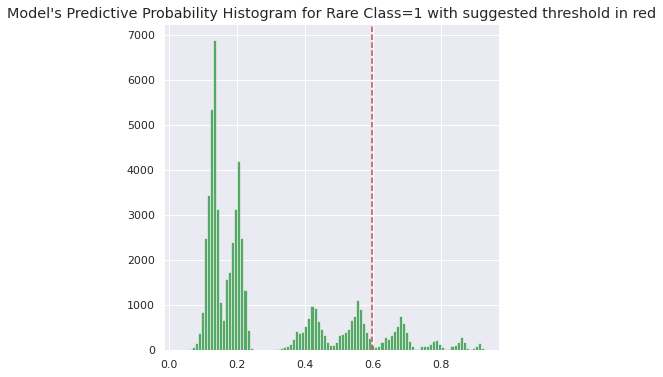

    Using threshold=0.5. However, 0.597 provides better F1=0.34 for rare class...
########################################################
Linear Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 87.9%
Balanced Accuracy = 63.59% with Threshold = 0.50
Confusion Matrix:
[[46829 11038]
 [ 2422  2085]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87     57867
           1       0.16      0.46      0.24      4507

    accuracy                           0.78     62374
   macro avg       0.55      0.64      0.56     62374
weighted avg       0.89      0.78      0.83     62374

Balanced Accuracy = 67.04% with Threshold = 0.60
Confusion Matrix:
[[52932  4935]
 [ 2587  1920]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     57867
           1       0.28      0.43      0.34      4507

    accuracy                           0.88     62374
   macro avg       0.62     

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 88.1%
    Balanced Accuracy = 66.7%
    Precision         = 28.1%
    Average Precision = 61.7%
    Recall            = 41.6%
    F1 Score          = 33.5%
#####################################################
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     57867
           1       0.28      0.42      0.34      4507

    accuracy                           0.88     62374
   macro avg       0.62      0.67      0.63     62374
weighted avg       0.90      0.88      0.89     62374

[[53061  4806]
 [ 2630  1877]]
#############################################################################
Single Model is better than Ensembling Models for this data set.
Could not plot Cross Validation Parameters
    Time taken for this Target (in seconds) = 992
    Binning_Flag set to False or ther

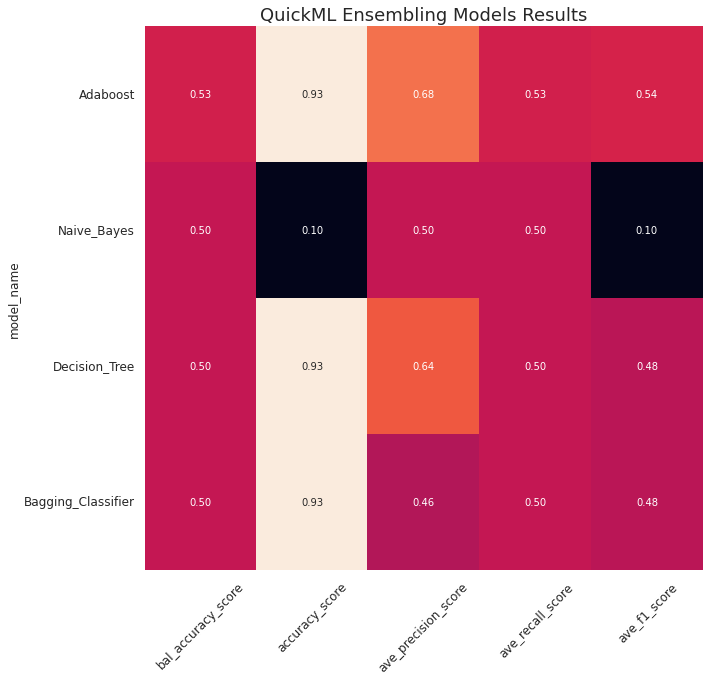

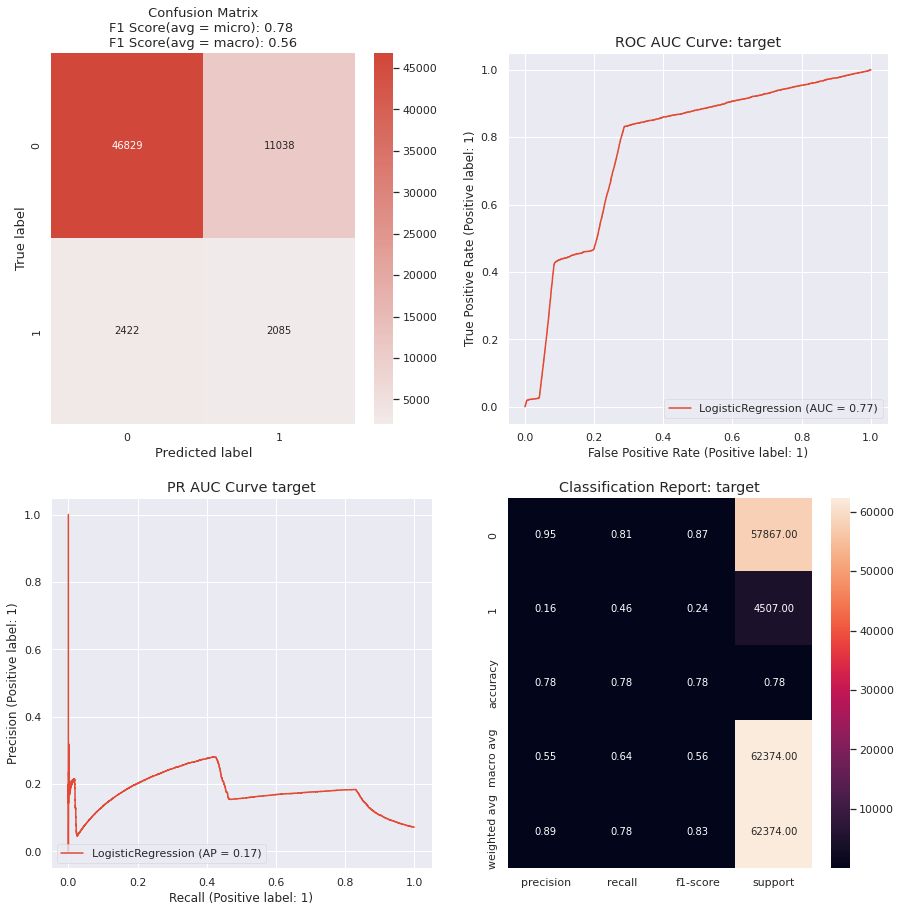

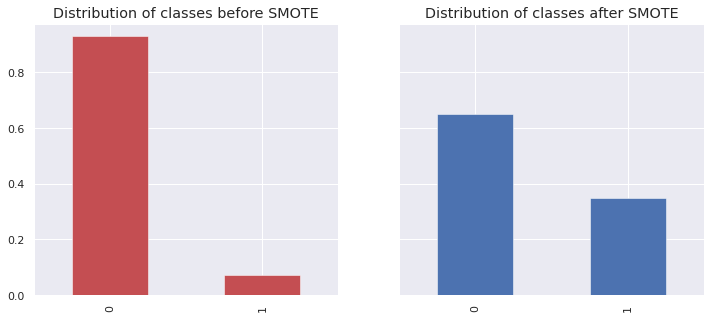

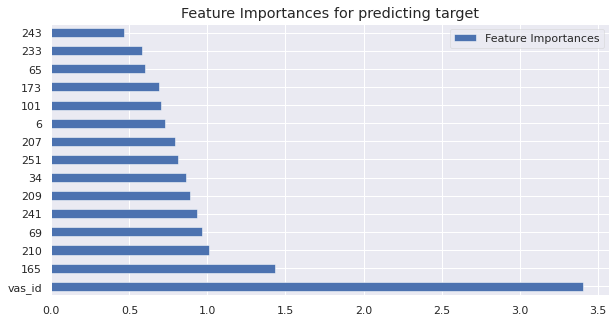

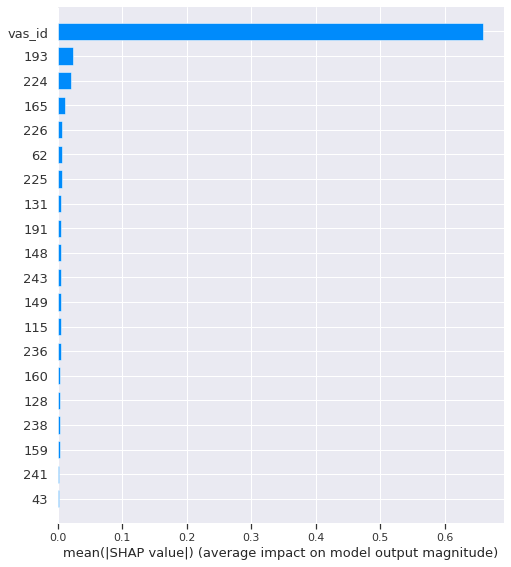

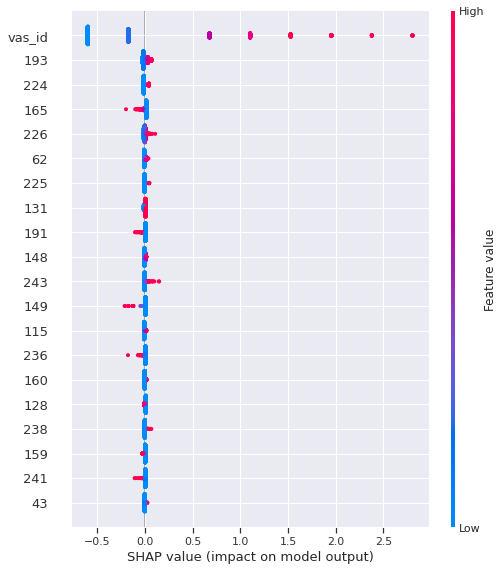

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 1736
Writing Output files to disk...
    Saving predictions to ./target/target_Binary_Classification_test_modified.csv
    Saving predictions to ./target/target_Binary_Classification_submission.csv
    Saving predictions to ./target/target_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 29.7 for the Entire Process


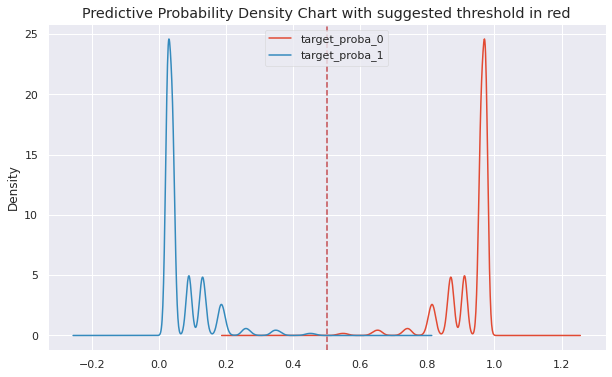

In [ ]:
m, feats, trainm, testm = Auto_ViML(train, 
                                    target, 
                                    test, 
                                    sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    # KMeans_featurizer=True works well in NLP and CatBoost models since it creates cluster variables
                                    KMeans_Featurizer=False,
                                    hyper_param='RS', # 'GS',
                                    # feature_reduction=True is the default and works best. But when you have <10 features in data, set it to False
                                    feature_reduction=True,
                                    # 4. It is recommended that you first set Boosting_Flag=None to get a Linear model. 
                                    # Once you understand that, then you can try to set Boosting_Flag=False to get a Random Forest model. 
                                    # Finally, try Boosting_Flag=True to get an XGBoost model. This is the order that we recommend in order to use Auto_ViML.
                                    # 5. Finally try Boosting_Flag="CatBoost" to get a complex but high performing model.
                                    Boosting_Flag=None,
                                    # 6. Binning_Flag=True improves a CatBoost model since it adds to the list of categorical vars in data
                                    Binning_Flag=False,
                                    # Add_Poly=3 improves certain models where there is date-time or categorical and numeric variables
                                    Add_Poly=0, 
                                    # Do not use Stacking_Flag=True with Linear models since your results may not look great.
                                    Stacking_Flag=False,            
                                    Imbalanced_Flag=True, 
                                    verbose=2)           

In [ ]:
def reverse_dict(map_dict):
    return dict([(v,k) for (k,v) in map_dict.items()])
# Use this to Test Classification Problems Only ####
ret_dict = {0: 0, 1: 1}
map_dict = reverse_dict(ret_dict)
m_thresh = 0.21
modelname='XGBoost'
#####################################################################
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
try:
    print('Normal Balanced Accuracy = %0.2f%%' %(
        100*balanced_accuracy_score(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values)))
    print('Test results since target variable is present in test data:')
    print(confusion_matrix(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values))
    print(classification_report(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>0.5).astype(int).values))
    print('Modified Threshold Balanced Accuracy = %0.2f%%' %(
        100*balanced_accuracy_score(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values)))
    print(confusion_matrix(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values))
    print(classification_report(test[target].map(map_dict).values, (
            testm[target+'_proba_'+'1']>m_thresh).astype(int).values))
except:
    print('No target variable present in test data. No results')
